In [2]:

import pandas as pd
import seaborn as sns 
from pandas import DataFrame
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
import numpy as np
import plotly
import statistics
import plotly.express as px
import stats
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score
import plotly.express as px
import datetime
import datetime as dt
import time
import django.template.backends.jinja2


cmap = sns.diverging_palette(220, 15, as_cmap=True)

In [3]:
c='business.retailsales2.csv'
df=pd.read_csv(c)
print(df.head(3))

      Month  Year  Total Orders  Gross Sales  Discounts  Returns  Net Sales  \
0   January  2017            73       8861.5     -129.4  -448.45    8283.65   
1  February  2017            56       6908.5     -104.7  -416.20    6387.60   
2     March  2017            60       5778.5     -172.2 -1017.20    4589.10   

   Shipping  Total Sales  
0   1088.30      9371.95  
1    892.45      7280.05  
2    707.43      5296.53  


In [4]:
c='business.retailsales.csv'
df_c=pd.read_csv(c)
print(df_c)

         Product Type  Net Quantity  Gross Sales  Discounts  Returns  \
0     Art & Sculpture            34      14935.0    -594.00 -1609.00   
1              Basket            13       3744.0    -316.80     0.00   
2              Basket            12       3825.0    -201.60  -288.00   
3              Basket            17       3035.0     -63.25     0.00   
4     Art & Sculpture            47       2696.8     -44.16     0.00   
...               ...           ...          ...        ...      ...   
1770          Kitchen             0         28.0      -2.81   -25.19   
1771          Jewelry             0         28.0       0.00   -28.00   
1772           Basket             0        116.0     -23.20   -92.80   
1773          Kitchen             0         16.5       0.00   -16.50   
1774          Kitchen            -1          0.0       0.00  -106.25   

      Total Net Sales  
0            12732.00  
1             3427.20  
2             3335.40  
3             2971.75  
4             2

# Correlations

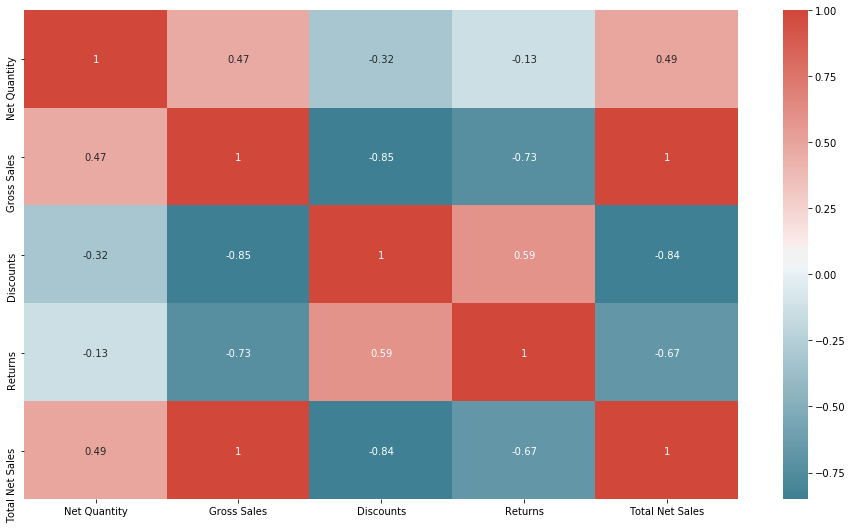

In [5]:
plt.figure(figsize=(16,9))
sns.heatmap(df_c.corr(),cmap=cmap, annot=True)
plt.show()

# Month Gross sales

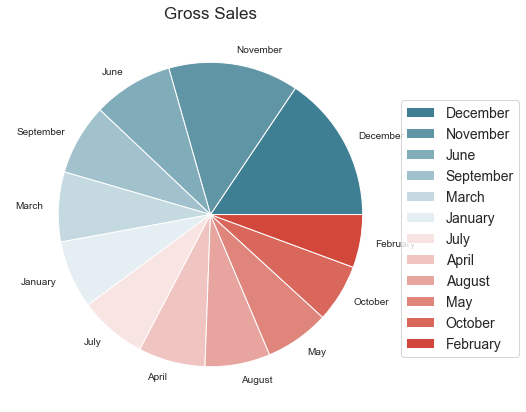

In [6]:
sns.set_style("whitegrid")
df = df.groupby('Month').agg({'Gross Sales': 'sum'}).sort_values('Gross Sales', ascending=False)

ax = df.plot.pie(y='Gross Sales', figsize=(8,7), colormap=cmap)
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, bbox_to_anchor=(1.0, 0.8), loc=2, borderaxespad=0., fontsize=14)
plt.ylabel(' ')
plt.title('Gross Sales', fontsize=17)
plt.show()

In [7]:
"""quantity_order = df_c['Net Quantity'].value_counts().index
product_order = df_c['Product Type'].value_counts().index
d = df_c['Discounts'].value_counts().index
df_c =df_c.loc[df_c['Product Type'].isin(product_order[:10])]
df_c =df_c.loc[df_c['Net Quantity'].isin(quantity_order[:57])]"""

"quantity_order = df_c['Net Quantity'].value_counts().index\nproduct_order = df_c['Product Type'].value_counts().index\nd = df_c['Discounts'].value_counts().index\ndf_c =df_c.loc[df_c['Product Type'].isin(product_order[:10])]\ndf_c =df_c.loc[df_c['Net Quantity'].isin(quantity_order[:57])]"

# Product net quantity

In [8]:
c='business.retailsales.csv'
df_c=pd.read_csv(c)
#print(df_c)

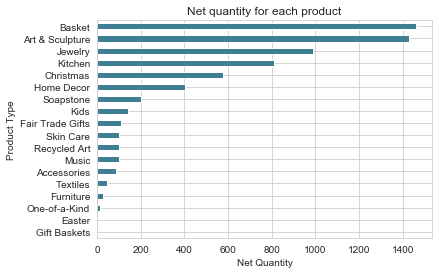

In [9]:
df_c = df_c.groupby('Product Type').agg({'Net Quantity':sum}).sort_values('Net Quantity', ascending=True)
df_c.plot(kind='barh', colormap=cmap, legend=False).set_title('Net quantity for each product')
plt.xlabel('Net Quantity')
plt.show()

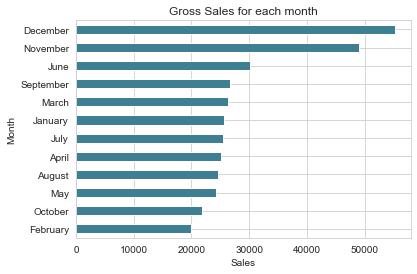

In [10]:
df = df.groupby('Month').agg({'Gross Sales':sum}).sort_values('Gross Sales', ascending=True)
df.plot(kind='barh', colormap=cmap, legend=False).set_title('Gross Sales for each month')
plt.xlabel('Sales')
plt.show()

Text(0.5, 0, 'Sales')

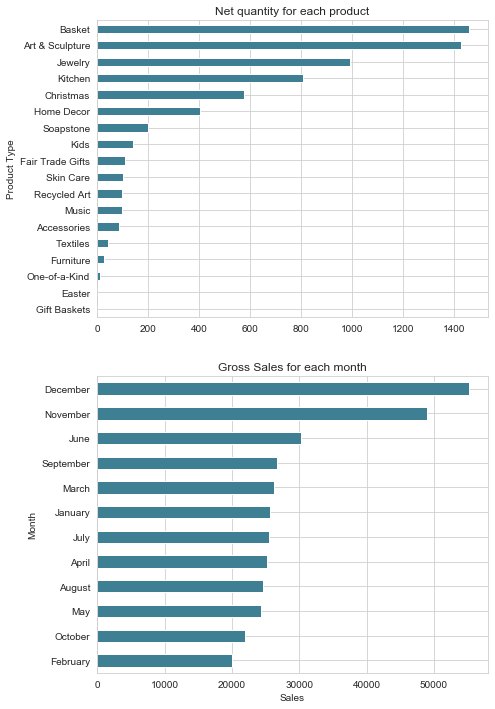

In [13]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=2, figsize=(7, 12), sharex=False)

df_c = df_c.groupby('Product Type').agg({'Net Quantity':sum}).sort_values('Net Quantity', ascending=True)
df_c.plot(kind='barh', colormap=cmap, ax=axes[0],legend=False) 
axes[0].set_title('Net quantity for each product')
plt.xlabel('Net Quantity')

df = df.groupby('Month').agg({'Gross Sales':sum}).sort_values('Gross Sales', ascending=True)
df.plot(kind='barh', colormap=cmap, ax=axes[1],legend=False)
axes[1].set_title('Gross Sales for each month')
plt.xlabel('Sales')
